# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Observations:

# 1. The temperature is warmest as the equator is approached, and drops as travel away from the equator happens in both
# hemispheres. This is evidenced by our temperature plot being shaped as a curve; there is a positive slope as zero is approached 
# on the graph, then a negative slope at data points with latitude greater than zero.

# 2. Latitude appears to have a greater effect on humidity in the Northern Hemisphere rather than the Southern Hemisphere;
# however, neither relationship is particularly strong. Further statistical analysis would be needed to ensure the relationship
# is not simply due to this particular set of random latitudes. 

# 3. When cloud cover is present, it tends to be full cloud cover more often than partial cloud cover. This was seen in both the 
# Northern and Southern Hemispheres, but less so in the Southern Hemisphere due to fewer data points. There doesn't appear to be 
# a strong relationship with cloud cover in either hemisphere, but I would recommend further statistical analysis to confirm this. 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
full_url = f"{url}appid={weather_api_key}&units={units}&q="

city_id_list = []
city_name_list = []
country_list = []
latitude_list = []
longitude_list = []
temperature_list = []
humidity_list = []
clouds_list = []
wind_list = []

for city in cities:
    response = requests.get(full_url + city).json()
    
    try:
        
        city_id = response ['id']
        city_id_list.append(city_id)
        
        city_name = response['name']
        city_name_list.append(city_name)
        
        country= response ['sys']['country']
        country_list.append(country)
        
        latitude = response['coord']['lat']
        latitude_list.append(latitude)
        
        longitude = response['coord']['lon']
        longitude_list.append(longitude)                   
                           
        temperature = response['main']['temp']
        temperature_list.append(temperature)

        humidity = response['main']['humidity']
        humidity_list.append(humidity)

        clouds = response['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response['wind']['speed']
        wind_list.append(wind_speed)
        
        time_sleep = 60
                           
                           
        print(f"City Name: {city}, City ID; {city_id}")    
                           
                           
    except:
                           
        print("City not found, searching for next city...")                   

City Name: chokurdakh, City ID; 2126123
City not found, searching for next city...
City Name: lagoa, City ID; 3372964
City Name: mataura, City ID; 6201424
City Name: saldanha, City ID; 3361934
City Name: ponta do sol, City ID; 2264557
City Name: ketchikan, City ID; 5554428
City Name: sobolevo, City ID; 525426
City Name: hermanus, City ID; 3366880
City Name: puerto ayora, City ID; 3652764
City Name: punta arenas, City ID; 3874787
City Name: upernavik, City ID; 3418910
City Name: harbour breton, City ID; 5970478
City Name: skjervoy, City ID; 777682
City Name: bluff, City ID; 2206939
City Name: ust-nera, City ID; 2120048
City Name: hithadhoo, City ID; 1282256
City Name: yellowknife, City ID; 6185377
City Name: labuhan, City ID; 8079926
City Name: tomelloso, City ID; 2510392
City Name: goderich, City ID; 5962442
City Name: rosario oeste, City ID; 3450872
City Name: castro, City ID; 3466704
City Name: pevek, City ID; 2122090
City Name: half moon bay, City ID; 5354943
City Name: kapaa, City 

City Name: kruisfontein, City ID; 986717
City Name: utete, City ID; 149070
City Name: lewisporte, City ID; 6053446
City Name: kautokeino, City ID; 779330
City Name: san jose, City ID; 5392171
City Name: sibu, City ID; 1735902
City Name: rocha, City ID; 3440777
City Name: port macquarie, City ID; 2152659
City Name: cuitareo, City ID; 4012202
City Name: ransang, City ID; 1691872
City Name: komsomolskiy, City ID; 1513491
City Name: naze, City ID; 1855540
City Name: kenora, City ID; 5991056
City Name: lucapa, City ID; 145724
City Name: gravdal, City ID; 3155152
City Name: bilibino, City ID; 2126682
City Name: canutama, City ID; 3664716
City Name: huarmey, City ID; 3939168
City Name: ilinskiy, City ID; 557140
City Name: ust-kuyga, City ID; 2013921
City Name: bengkulu, City ID; 1649150
City Name: geraldton, City ID; 2070998
City Name: saint-philippe, City ID; 935215
City Name: lucea, City ID; 3489657
City Name: petropavlovsk-kamchatskiy, City ID; 2122104
City Name: puerto escondido, City ID;

City Name: yanam, City ID; 1252795
City not found, searching for next city...
City Name: el pardo, City ID; 1713913
City Name: puerto baquerizo moreno, City ID; 3652758
City Name: calabozo, City ID; 3647444
City Name: punta alta, City ID; 3839982
City Name: panzhihua, City ID; 6929460
City Name: sechura, City ID; 3691954
City Name: yukamenskoye, City ID; 466674
City Name: berlevag, City ID; 780687
City Name: rosarito, City ID; 3988392
City Name: lazaro cardenas, City ID; 4026082
City Name: quatre cocos, City ID; 1106643
City Name: santo antonio do amparo, City ID; 3449516
City Name: gwanda, City ID; 890516
City Name: green river, City ID; 5826559
City Name: bagdarin, City ID; 2027244
City Name: zhuanghe, City ID; 1784055
City Name: vung tau, City ID; 1562414
City Name: panama city, City ID; 3703443
City not found, searching for next city...
City Name: cap-aux-meules, City ID; 5915327
City Name: pochutla, City ID; 3517970
City Name: callaway, City ID; 4149635
City Name: mandalgovi, City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({"City ID": city_id_list, "City Name": city_name_list, "Country": country_list, "Lat": latitude_list, "Lon": longitude_list, "Temp": temperature_list,
                           "Humidity": humidity_list, "Cloudiness": clouds_list, "Wind Speed": wind_list})
city_df

,City ID,City Name,Country,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed
0,2126123,Chokurdakh,RU,70.6333,147.9167,-34.83,100,95,6.76
1,3372964,Lagoa,PT,39.0500,-27.9833,62.71,83,1,7.87
2,6201424,Mataura,NZ,-46.1927,168.8643,74.70,36,100,3.91
3,3361934,Saldanha,ZA,-33.0117,17.9442,57.25,75,0,17.83
4,2264557,Ponta do Sol,PT,32.6667,-17.1000,64.35,72,17,6.20
...,...,...,...,...,...,...,...,...,...
583,2038067,Chifeng,CN,42.2683,118.9636,32.41,37,91,21.79
584,2386756,Gamboula,CF,4.1178,15.1393,70.32,84,88,2.66
585,694558,Semypolky,UA,50.7167,30.9333,29.52,75,88,12.59
586,2176639,Batemans Bay,AU,-35.7167,150.1833,75.22,59,4,9.22


In [8]:
city_df.to_csv(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Output\city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_df['Humidity'].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

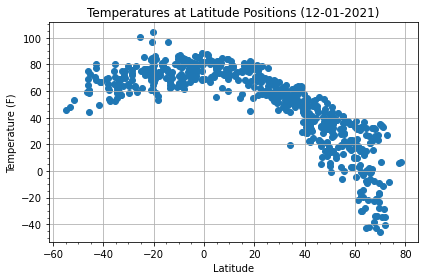

In [11]:
x_values = city_df["Lat"]
y_values = city_df["Temp"]

plt.scatter(x_values, y_values)
plt.title("Temperatures at Latitude Positions (12-01-2021)")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-')
plt.tight_layout()
plt.show;
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\Temp_Lat.png')

## Latitude vs. Humidity Plot

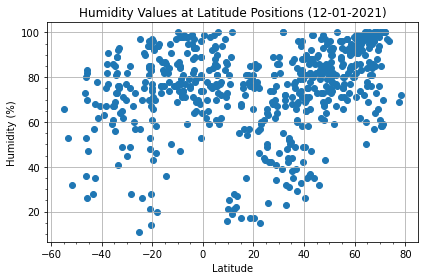

In [13]:
x_values = city_df["Lat"]
y_values = city_df["Humidity"]

plt.scatter(x_values, y_values)
plt.title("Humidity Values at Latitude Positions (12-01-2021)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-')
plt.tight_layout()
plt.show;
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\Humid_Lat.png')

## Latitude vs. Cloudiness Plot

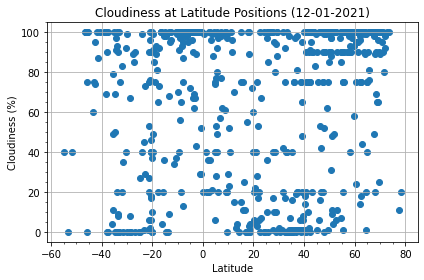

In [14]:
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]

plt.scatter(x_values, y_values)
plt.title("Cloudiness at Latitude Positions (12-01-2021)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-')
plt.tight_layout()
plt.show;
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\Cloud_Lat.png')

## Latitude vs. Wind Speed Plot

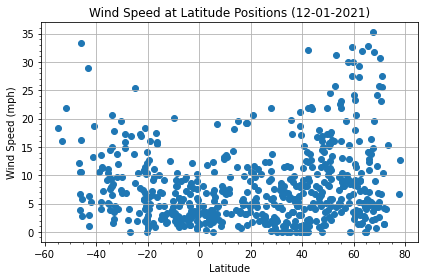

In [15]:
x_values = city_df["Lat"]
y_values = city_df["Wind Speed"]

plt.scatter(x_values, y_values)
plt.title("Wind Speed at Latitude Positions (12-01-2021)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-')
plt.tight_layout()
plt.show;
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\Wind_Lat.png')

## Linear Regression

In [16]:
mask = city_df['Lat'] > 0
northern_df = city_df[mask]
southern_df = city_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7505648105245234


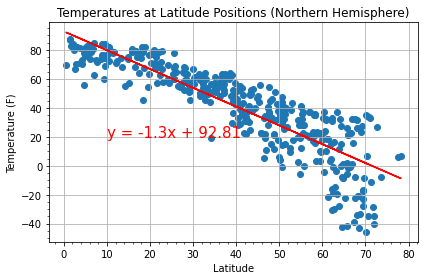

In [17]:
x_values = northern_df['Lat']
y_values = northern_df['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show;()
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\North_Temp_Lat.png')
print(f"The r-squared value is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.292681136858827


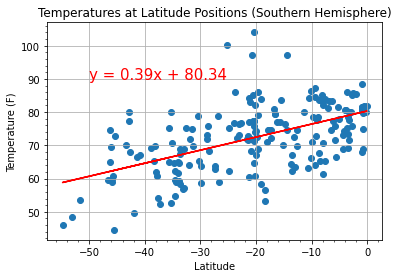

In [18]:
x_values = southern_df['Lat']
y_values = southern_df['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.show;()
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\South_Temp_Lat.png')
print(f"The r-squared value is: {rvalue**2}")

In [ ]:
# In the Northern Hemisphere, there is a clear, strong negative correlation between temperature and latitude: 
# as latitiude increases, temperature decreases. This makes sense because as latitude increases in the Northern Hemisphere,
# the farther north one travels. In the Southern Hemisphere, there is a positive correlation between latitude and temperature;
# as the latitude numbers increase, so does the temperature. In this hemisphere, since the latitude numbers are negative,
# it makes sense that this would be the inverse of the Northern Hemisphere. However, the strength of the relationship between
# latitude and temperature is moderately weaker in the Southern Hemisphere, compared to its Northern counterpart.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.1288899395256619


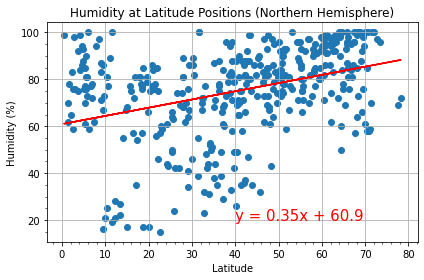

In [19]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show;()
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\North_Humid_Lat.png')
print(f"The r-squared value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.11731071248003005


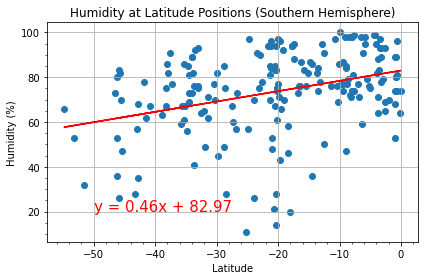

In [20]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show;()
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\South_Humid_Lat.png')
print(f"The r-squared value is: {rvalue**2}")

In [ ]:
# In both the Northern and Southern Hemispheres, a weak positive correlation exists between latitude and humidity: 
# as latitude increases, so does humidity. These relationships clearly do not have the same strength of relationship as
# temperatures in either hemisphere. As evidenced by the r-squared values, these relationships are not strong, and could
# potentially be explained by the random latitudes picked in our code. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.10739549971711145


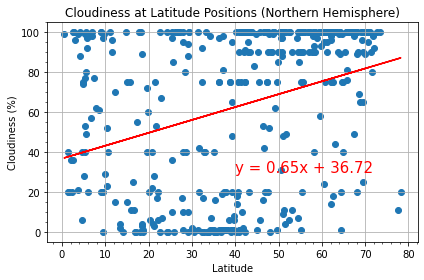

In [22]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show;()
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\North_Cloud_Lat.png')
print(f"The r-squared value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.05604223320226926


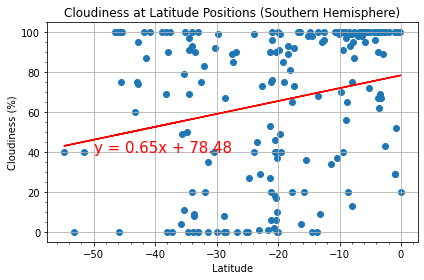

In [23]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show;()
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\South_Cloud_Lat.png')
print(f"The r-squared value is: {rvalue**2}")

In [ ]:
# Both the Northern and Southern Hemispheres indicate positive correlations between latitude and humidity; however, these
# relationships do not appear to be strong as indicated by the r-squared values. There are many data points in both the Northern
# and Southern Hemispheres that are either 0% cloudiness or 100% cloudiness, but the Northern Hemisphere has more data points overall
# and it may appear that this relationship is stronger in the North than in the South, when it might not be the case. In the North,
# if clouds exist, it appears to be total cloud cover much of the time. This is not so with the South. With both of these graphs side by side,
# I would conclude that there is not a strong relationship of cloudiness to latitude in either hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0710750985335697


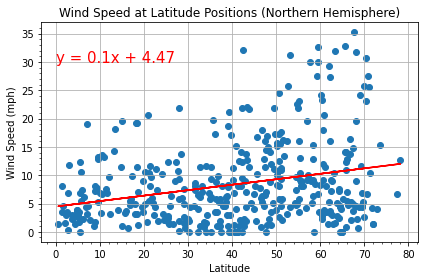

In [24]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show;()
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\North_Wind_Lat.png')
print(f"The r-squared value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.17717905897641098


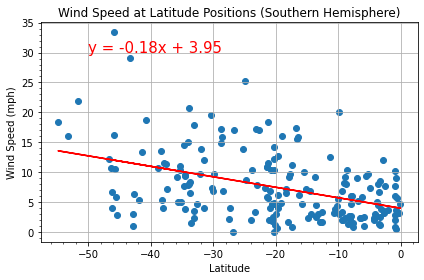

In [25]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show;()
plt.savefig(r'C:\Users\Thissen\Python-API-Challenge\WeatherPy\Images\South_Wind_Lat.png')
print(f"The r-squared value is: {rvalue**2}")

In [ ]:
# While there is a weak positive correlation between wind speed and latitude in the Northern Hemisphere, there is a
# moderately stronger negative correlation between the variables in the Southern Hemisphere. That is, wind speed decreases
# as we approach the equator in both hemispheres, but the r-squared values indicate that this is a stronger relationship
# in the Southern Hemisphere. It is worth noting that there are many more data points in the Northern Hemisphere than the 
# Southern Hemisphere, yet there is still a stronger correlation in the South than in the North. I believe that this demonstrates
# an actual effect of latitude on wind speed in the Southern Hemisphere, and the relationship is less likely to be due to random 
# chance in the Southern Hemisphere and more likely to be due to chance in the Northern Hemisphere. 